# Cartopy

Cartopy is a Python library that provides cartographic projections and geographic data plotting capabilities. It is built on top of Matplotlib and NumPy, making it easy to create maps with high-quality visualizations. Cartopy allows users to work with various geospatial data formats, such as shapefiles, GeoJSON, and raster data, and supports a wide range of map projections for visualizing data on different map surfaces.

Key features of Cartopy include:

1. **Map Projections**: Cartopy supports a wide range of map projections, including common ones like PlateCarree, Mercator, and Lambert Conformal, as well as more specialized projections like Robinson and Mollweide.

2. **Geospatial Data Handling**: Cartopy makes it easy to work with geospatial data in various formats, such as shapefiles, GeoJSON, and raster data. It provides tools for reading, writing, and manipulating geospatial datasets.

3. **Data Visualization**: Cartopy integrates seamlessly with Matplotlib, allowing users to create high-quality visualizations of geographic data. It provides functions for plotting point, line, and polygon data on maps, as well as tools for customizing the appearance of map elements.

4. **Map Features**: Cartopy includes built-in support for adding map features such as coastlines, rivers, lakes, and political boundaries to maps. These features can be customized and styled to match the requirements of the visualization.

5. **Interactivity**: Cartopy supports interactive plotting using Matplotlib's interactive backend, allowing users to zoom, pan, and interact with maps in real-time.

Overall, Cartopy is a powerful and flexible library for creating maps and visualizing geospatial data in Python. It is widely used in a variety of scientific disciplines, including meteorology, oceanography, geology, and environmental science, as well as in industry and academia for applications ranging from GIS analysis to data visualization and exploration.

- [Reference 1](https://foundations.projectpythia.org/core/cartopy/cartopy.html)
- [Reference 2](https://scitools.org.uk/cartopy/docs/latest/)

In [5]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
from cartopy import crs as ccrs, feature as cfeature

#  Suppress warnings issued by Cartopy when downloading data files
warnings.filterwarnings('ignore')

## 1. Map projections and GeoAxes
- Extend Matplotlib’s axes into georeferenced GeoAxes
- Since we imported `cartopy.crs`, we now have access to Cartopy’s Coordinate Reference System, which contains many geographical projections. 
- We can specify one of these projections for an Axes object to convert it into a GeoAxes object. 
- This will effectively georeference the subplot. 

## 2. Create a map with a specified projection

- In this example, we’ll create a GeoAxes object that uses the PlateCarree projection. 
- PlateCarree is a global lat-lon map projection in which each point is evenly spaced in terms of degrees. 
- The name “Plate Carree” is French for “flat square”.

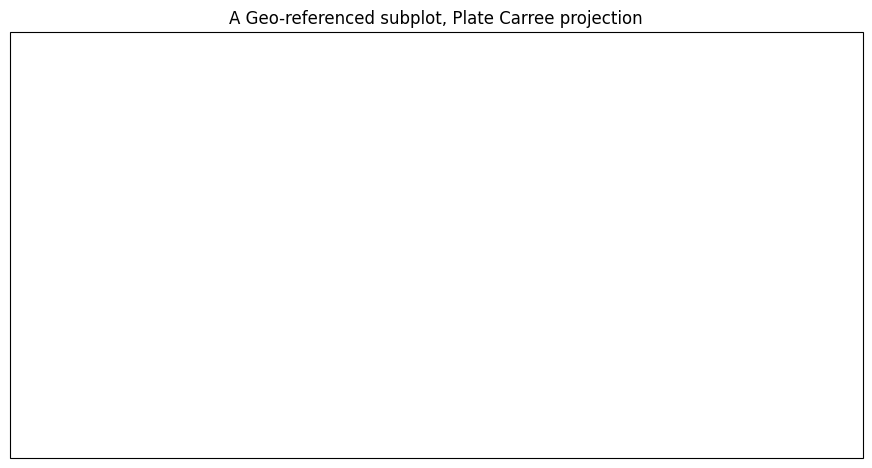

In [6]:
fig = plt.figure(figsize=(11, 8.5))
ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=-75))
ax.set_title("A Geo-referenced subplot, Plate Carree projection");

- Although the figure seems empty, it has, in fact, been georeferenced using a map projection; this projection is provided by Cartopy’s `crs` (coordinate reference system) class. 
- We can now add in cartographic features, in the form of `shapefiles`, to our subplot. 
- One such cartographic feature is coastlines, which can be added to our subplot using the callable GeoAxes method simply called coastlines.

In [7]:
ax.coastlines()

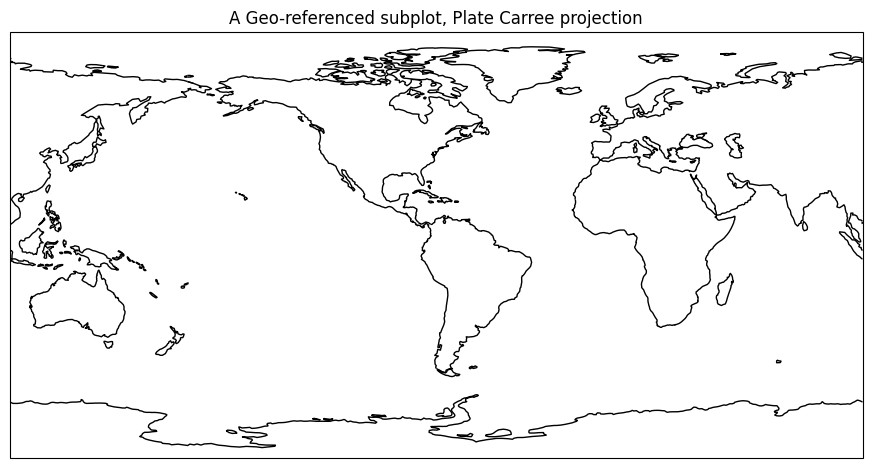

In [8]:
fig

### Add cartographic features to the map
- Cartopy provides other cartographic features via its features class.

In [9]:
ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='black')
ax.add_feature(cfeature.STATES, linewidth=0.3, edgecolor='brown')

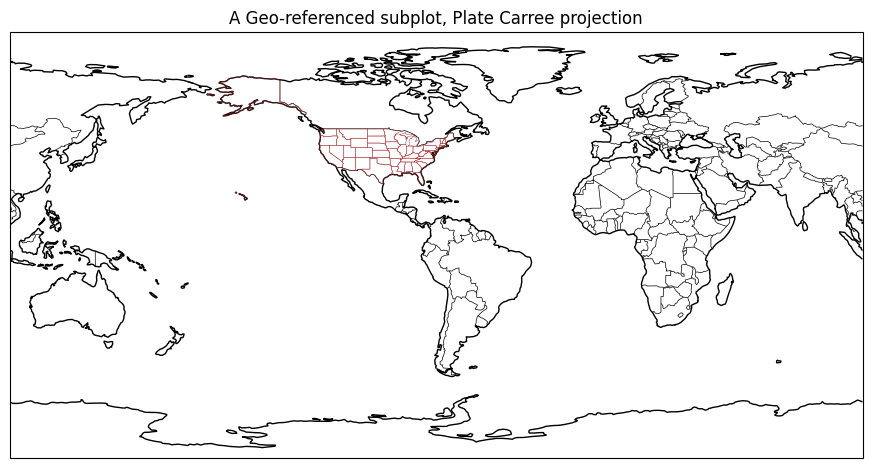

In [10]:
fig

In [35]:
# Define the bounding box coordinates
latN = 5
latS = -15
lonW = -74
lonE = -35
cLat = (latN + latS) / 2
cLon = (lonW + lonE) / 2

# Define the projection for the map
projPC = ccrs.PlateCarree()
projLccNY = ccrs.LambertConformal(central_longitude=cLon, central_latitude=cLat)

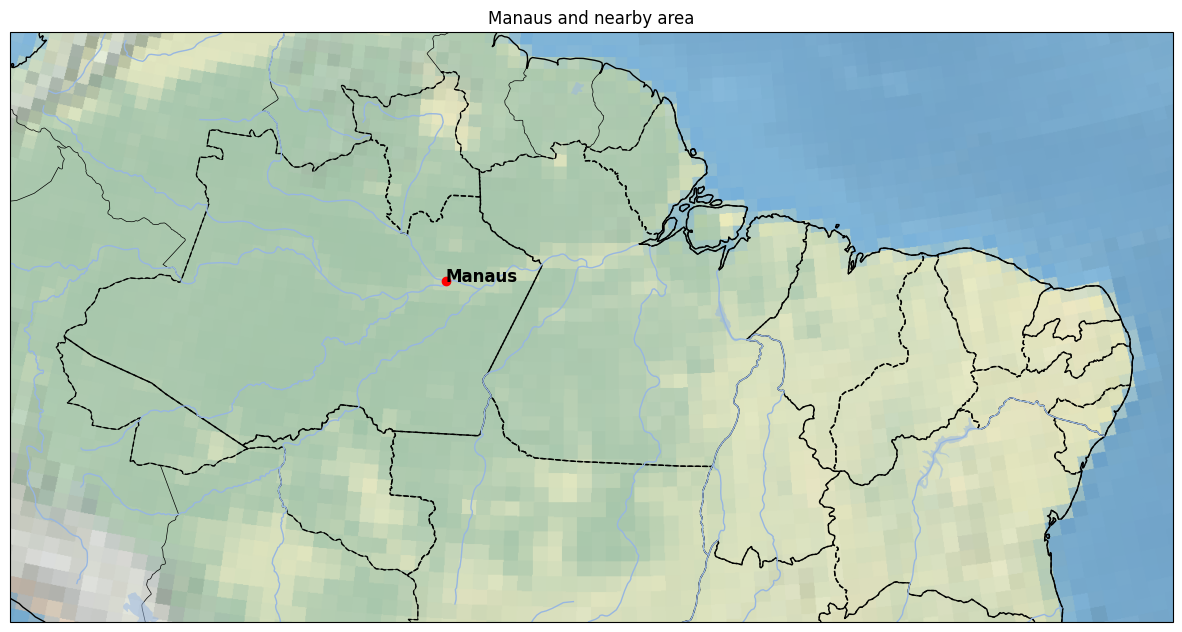

In [37]:
# Create the figure and axis with the Lambert Conformal Conic projection
fig = plt.figure(figsize=(15, 10))
ax = plt.subplot(1, 1, 1, projection=projLccNY)

# Set the extent and background color
ax.set_extent([lonW, lonE, latS, latN], crs=projPC)
ax.set_facecolor(cfeature.COLORS['water'])

# Add map features
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linewidth=0.5)
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.STATES, linestyle='--')
ax.add_feature(cfeature.RIVERS)

# Add a marker for Manaus
manaus_lon, manaus_lat = -60.0217, -3.1190
ax.plot(manaus_lon, manaus_lat, 'ro', transform=projPC)
ax.text(manaus_lon, manaus_lat, 'Manaus', transform=projPC, fontsize=12, fontweight='bold', ha='left')

# Set the title
ax.set_title('Manaus and nearby area')

# Add the stock imagery
ax.stock_img()

# Show the plot
plt.show()

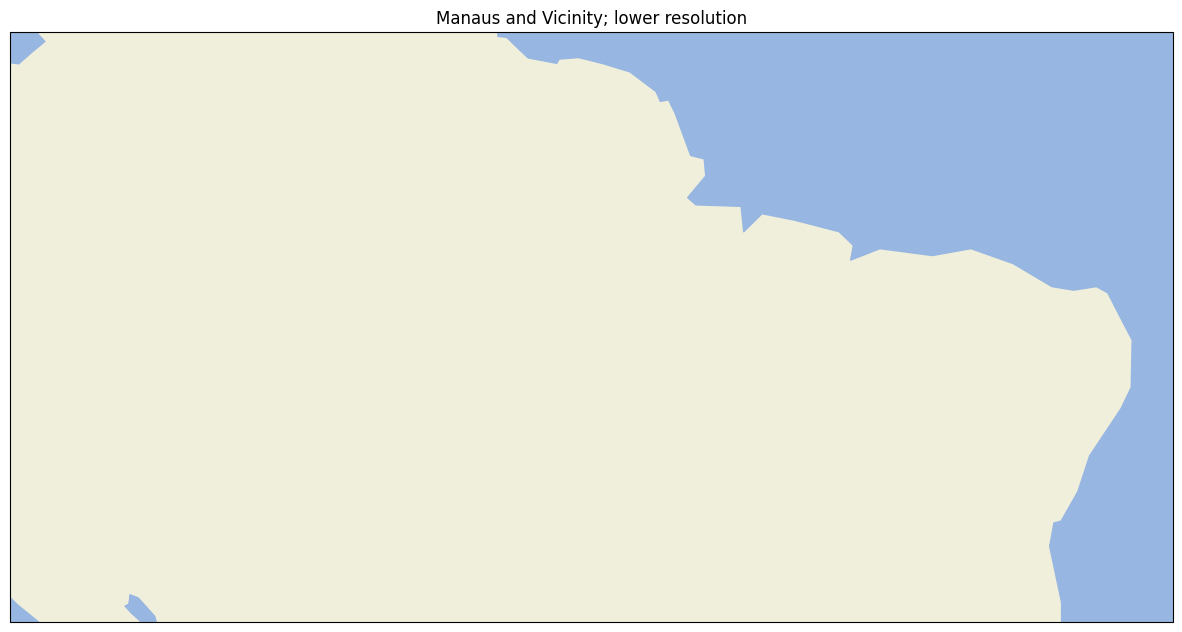

In [38]:
fig = plt.figure(figsize=(15, 10))
ax = plt.subplot(1, 1, 1, projection=projLccNY)
ax.set_extent((lonW, lonE, latS, latN), crs=projPC)

# The features with names such as cfeature.LAND, cfeature.OCEAN, are higher-resolution (10m)
# shapefiles from the Naturalearth repository.  Lower resolution shapefiles (50m, 110m) can be
# used by using the cfeature.NaturalEarthFeature method as illustrated below.

resolution = '110m'

land_mask = cfeature.NaturalEarthFeature(
    'physical',
    'land',
    scale=resolution,
    edgecolor='face',
    facecolor=cfeature.COLORS['land'],
)
sea_mask = cfeature.NaturalEarthFeature(
    'physical',
    'ocean',
    scale=resolution,
    edgecolor='face',
    facecolor=cfeature.COLORS['water'],
)
lake_mask = cfeature.NaturalEarthFeature(
    'physical',
    'lakes',
    scale=resolution,
    edgecolor='face',
    facecolor=cfeature.COLORS['water'],
)
state_borders = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lakes',
    scale=resolution,
    facecolor='none',
)

ax.add_feature(land_mask)
ax.add_feature(sea_mask)
ax.add_feature(lake_mask)
ax.add_feature(state_borders, linestyle='solid', edgecolor='black')
ax.set_title('Manaus and Vicinity; lower resolution');